In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df = pd.read_csv("auto-mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df["model year"].value_counts()

model year
73    40
78    36
76    34
82    31
75    30
80    29
79    29
81    29
70    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [7]:
df["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [8]:
df = df[df["horsepower"] != "?"]
df["horsepower"] = df["horsepower"].astype(int)

In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: >

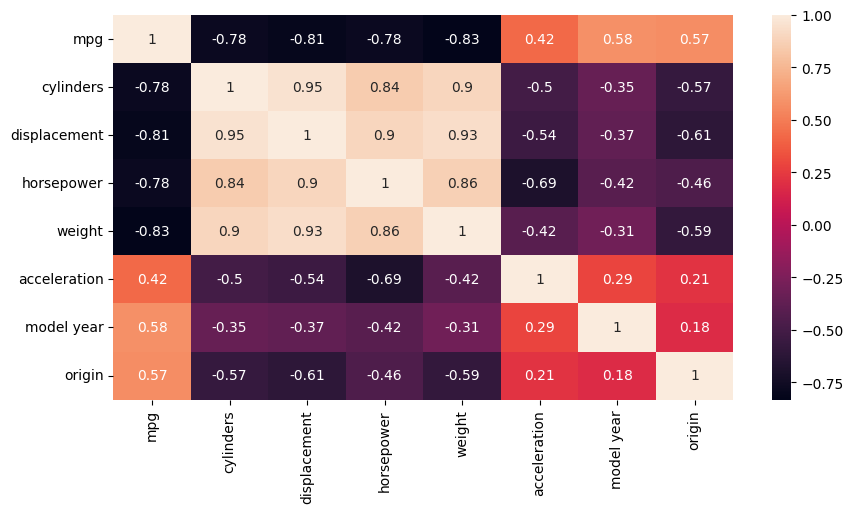

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.drop(columns=["car name"]).corr() , annot=True)

In [11]:
df.drop(columns=["car name"] , inplace=True)

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["mpg"])
y= df["mpg"]

X_train , X_test , y_train ,y_test = train_test_split(X , y , 
                                                      random_state=42 , 
                                                      test_size=0.25)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score 
import mlflow

mlflow.sklearn.autolog()

with mlflow.start_run() :
    model_1_linear = KNeighborsRegressor(n_neighbors=5)
    model_1_linear.fit(X_train ,y_train)



    y_preds = model_1_linear.predict(X_test)

    mae = mean_absolute_error(y_test ,y_preds)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r2 = r2_score(y_true=y_test , y_pred=y_preds)


    print(f"Mean Squared Error : {mse} \nMean Absolute error : {mae} \nRoot Mean Squared Error : {rmse} \nR2_Score : {r2}")



c:\Users\Vedant\anaconda3\envs\Pytorch_cuda_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2026/02/10 14:13:55 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/10 14:13:55 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/10 14:13:55 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/10 14:13:55 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/10 14:13:55 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/10 14:13:55 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/10 14:13:56 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/02/10 14:13:56 INFO mlflow.store.db.utils: Updating database tables
2026/02/1

Mean Squared Error : 6.583228571428571 
Mean Absolute error : 1.9479591836734695 
Root Mean Squared Error : 2.5657803045912897 
R2_Score : 0.8694661447927089


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


Mean Squared Error : 6.583228571428571 
Mean Absolute error : 1.9479591836734695 
Root Mean Squared Error : 2.5657803045912897 
R2_Score : 0.8694661447927089


In [126]:
# from sklearn.utils import all_estimators

# # Get all regressor classes in a list of (name, class) tuples
# estimators = all_estimators(type_filter='regressor')

# # Convert to a dictionary for easy iteration
# regressors_dict = {name: RegClass for name, RegClass in estimators}

# # Example: Iterating through and printing the first 5
# for name, RegClass in list(regressors_dict.items()):
#     print(f"Name: {name} | Class: {RegClass}")

In [127]:
# from sklearn.utils import all_estimators

# # Get all regressor classes in a list of (name, class) tuples
# estimators = all_estimators(type_filter='classifier')

# # Convert to a dictionary for easy iteration
# classifier_dict = {name: RegClass for name, RegClass in estimators}

# # Example: Iterating through and printing the first 5
# for name, RegClass in list(classifier_dict.items()):
#     print(f"Name: {name} | Class: {RegClass}")